In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [18]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [19]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train shape:  (60000, 784)
60000 train samples
10000 test samples


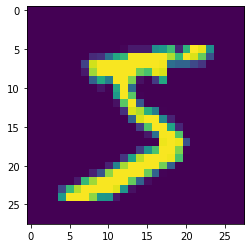

In [22]:
# make suare images have shape (28, 28, 1)
x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))

print("x_train shape: ", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

a_train_img = x_train[0]
a_train_img = np.reshape(a_train_img, (28, 28))
plt.imshow(a_train_img)

In [23]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [24]:
# Build the model
model = keras.Sequential(
[
    keras.Input(shape=(28*28,)),
    layers.Dense(num_classes, activation="softmax"),
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [33]:
batch_size = 128
epochs = 100

model.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/100
422/422 [==============================] - 1s 2ms/step - loss: 0.2338 - accuracy: 0.9354 - val_loss: 0.2255 - val_accuracy: 0.9375
Epoch 2/100
422/422 [==============================] - 1s 2ms/step - loss: 0.2329 - accuracy: 0.9358 - val_loss: 0.2273 - val_accuracy: 0.9387
Epoch 3/100
422/422 [==============================] - 1s 2ms/step - loss: 0.2326 - accuracy: 0.9360 - val_loss: 0.2269 - val_accuracy: 0.9378
Epoch 4/100
422/422 [==============================] - 1s 2ms/step - loss: 0.2326 - accuracy: 0.9356 - val_loss: 0.2275 - val_accuracy: 0.9382
Epoch 5/100
422/422 [==============================] - 1s 2ms/step - loss: 0.2319 - accuracy: 0.9365 - val_loss: 0.2275 - val_accuracy: 0.9378
Epoch 6/100
422/422 [==============================] - 1s 1ms/step - loss: 0.2318 - accuracy: 0.9358 - val_loss: 0.2280 - val_accuracy: 0.9388
Epoch 7/100
422/422 [==============================] - 1s 1ms/step - loss: 0.2320 - accuracy: 0.9357 - val_loss: 0.2271 - val_accuracy: 0.9378

Epoch 58/100
422/422 [==============================] - 1s 1ms/step - loss: 0.2238 - accuracy: 0.9380 - val_loss: 0.2363 - val_accuracy: 0.9372
Epoch 59/100
422/422 [==============================] - 1s 1ms/step - loss: 0.2240 - accuracy: 0.9373 - val_loss: 0.2368 - val_accuracy: 0.9373
Epoch 60/100
422/422 [==============================] - 1s 2ms/step - loss: 0.2234 - accuracy: 0.9380 - val_loss: 0.2364 - val_accuracy: 0.9373
Epoch 61/100
422/422 [==============================] - 1s 1ms/step - loss: 0.2237 - accuracy: 0.9377 - val_loss: 0.2379 - val_accuracy: 0.9363
Epoch 62/100
422/422 [==============================] - 1s 1ms/step - loss: 0.2238 - accuracy: 0.9379 - val_loss: 0.2373 - val_accuracy: 0.9377
Epoch 63/100
422/422 [==============================] - 1s 1ms/step - loss: 0.2235 - accuracy: 0.9379 - val_loss: 0.2371 - val_accuracy: 0.9385
Epoch 64/100
422/422 [==============================] - 1s 1ms/step - loss: 0.2231 - accuracy: 0.9379 - val_loss: 0.2397 - val_accuracy:

In [34]:
# Evaluate the trained model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.2906348407268524
Test accuracy:  0.9259999990463257


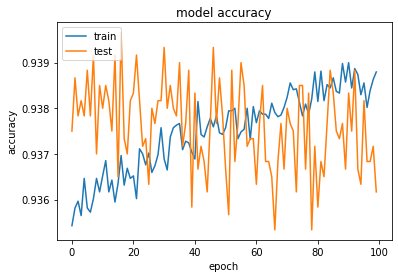

In [36]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

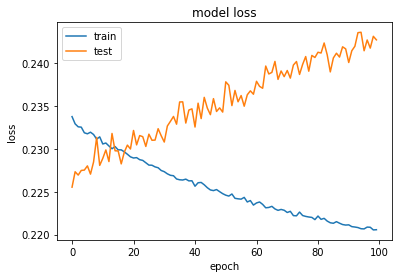

In [37]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()